In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm

In [75]:
AllFile = []
for i in range(1, 301):
    i1 = './eurosat/2750/AnnualCrop/AnnualCrop_%d.jpg' % i
    
    
    AllFile.append(i1)
    

for i in range(1, 301):
    i2 = './eurosat/2750/Forest/Forest_%d.jpg' % i
    
    AllFile.append(i2)
    

for i in range(1, 301):
    
    i3 = './eurosat/2750/HerbaceousVegetation/HerbaceousVegetation_%d.jpg' % i 
    AllFile.append(i3)
    

for i in range(1, 301):
    i4 = './eurosat/2750/Highway/Highway_%d.jpg' % i
    AllFile.append(i4)
    

for i in range(1, 301):
    i5 = './eurosat/2750/Industrial/Industrial_%d.jpg' % i
    
    AllFile.append(i5)

for i in range(1, 301):
    i6 = './eurosat/2750/Pasture/Pasture_%d.jpg' % i
   
    AllFile.append(i6)
    

for i in range(1, 301):
    i7 = './eurosat/2750/PermanentCrop/PermanentCrop_%d.jpg' % i
    
    AllFile.append(i7)
    

for i in range(1, 301):
    i8 = './eurosat/2750/Residential/Residential_%d.jpg' % i
    
    
    AllFile.append(i8)
    

for i in range(1, 301):
    
    i9 = './eurosat/2750/River/River_%d.jpg' % i
   
    
    
    AllFile.append(i9)
   

for i in range(1, 290):
    i10 = './eurosat/2750/SeaLake/SeaLake_%d.jpg' % i
    
    
    AllFile.append(i10)

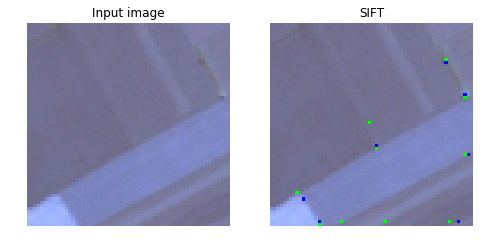

In [76]:
img = cv2.imread(AllFile[110])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img)
ax1.set_title('Input image')

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

ax2.axis('off')
ax2.imshow(img, cmap=plt.cm.gray)
ax2.set_title('SIFT')
plt.show()

In [77]:
#feature
print(centroids)

[[31.20586748 31.24279211]
 [55.29032258 12.64516129]
 [61.34482759 22.17241379]
 [33.5        38.5       ]
 [62.5        41.        ]
 [10.25       55.17857143]
 [15.5        62.5       ]
 [22.5        62.5       ]
 [36.5        62.5       ]
 [59.         62.5       ]]


In [78]:
import pandas as pd
df = pd.read_csv('./label.csv')
df.head()

,file,label
0,./eurosat/2750/AnnualCrop/AnnualCrop_1.jpg,AnnualCrop
1,./eurosat/2750/AnnualCrop/AnnualCrop_2.jpg,AnnualCrop
2,./eurosat/2750/AnnualCrop/AnnualCrop_3.jpg,AnnualCrop
3,./eurosat/2750/AnnualCrop/AnnualCrop_4.jpg,AnnualCrop
4,./eurosat/2750/AnnualCrop/AnnualCrop_5.jpg,AnnualCrop


In [79]:
SIFT_features=[]
SIFT_images=[]

for i in df['file'] :
    img = cv2.imread(i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find Harris corners
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    dst = cv2.dilate(dst,None)
    ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

    # Now draw them
    res = np.hstack((centroids,corners))
    res = np.int0(res)
    res[res > 63] = 63
    img[res[:,1],res[:,0]] = [0,0,255]
    img[res[:,3],res[:,2]] = [0,255,0]
    
    SIFT_images.append(img)
    SIFT_features.append(centroids)

In [80]:
labels =  np.array(df['label'])

In [81]:
sift_feature = np.array(SIFT_features)

In [82]:
data_frame = np.hstack((sift_feature.ravel(),labels))

In [83]:
np.random.shuffle(data_frame)
partition = int(len(SIFT_features)*70/100)

In [86]:
x_train, x_test = data_frame[:partition,:-1].ravel(),  data_frame[partition:,:-1].ravel()
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

IndexError: too many indices for array

In [ ]:
clf = svm.SVC(kernel='linear', C=10).fit(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)